# Gaussian Process

## Prerequisites
### Properties of Multivariate Gaussian Distributions

A Gaussian random variable $X \sim \mathcal N(\mu,\Sigma)$, where the $\mu$ and $\Sigma$ are the mean and the covariance matrix, respectively.

Gaussian Distribution has the following probability density function


$$ \mathbb P (x, \mu, \Sigma) = \frac{ exp \Big( -0.5 \big(x - \mu \big)^T \Sigma^{-1} \big( x-\mu \big) \Big)}{ \big( 2\pi \big)^{\frac{d}{2}} |\Sigma|}$$
where $|\Sigma|$ is the determinant of $\Sigma$.



__The Central Limit Theorem states that the mean of $n > 0$ samples is normally distributed.__



Gaussian Distribution is closed under four operators.

1. Normalization
2. Marginalization
3. Summation
4. Conditioning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns; sns.set()

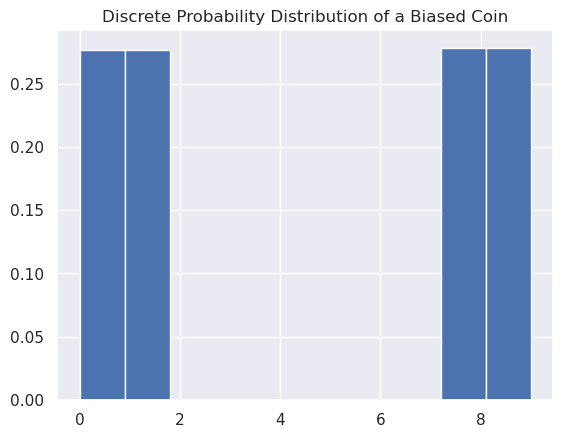

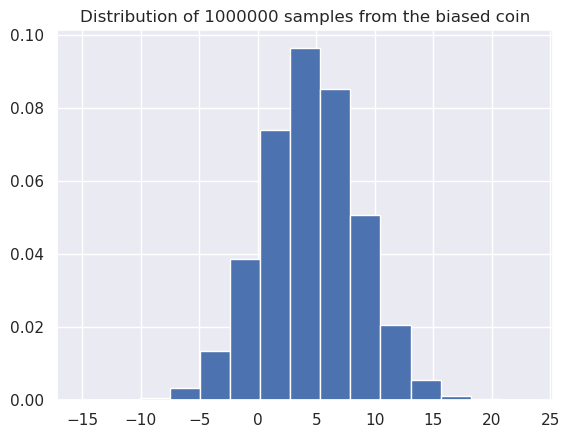

In [2]:

N=10**6
samples=np.random.choice(10, N, p=[.25, .25, 0, 0, 0, 0, 0, 0, .25, .25])
_, bins, _ = plt.hist(samples,density=True)
plt.title('Discrete Probability Distribution of a Biased Coin')
plt.show()
mu,sigma=samples.mean(),samples.std()
plt.hist(np.random.default_rng().normal(samples.mean(), samples.std(), N), 15, density=True)
plt.title(f'Distribution of {N} samples from the biased coin')
plt.show()



#### Setup:
Let
$y=\begin{bmatrix} y_A\\ y_B \end{bmatrix}$ be a gaussian variable
with $\mu=\begin{bmatrix} \mu_A\\ \mu_B \end{bmatrix},\Sigma=\begin{bmatrix} \Sigma_{AA}, \Sigma_{AB} \\ \Sigma_{BA}, \Sigma_{BB} \end{bmatrix}$

### 1. Normalization

$$  \int_y \mathbb P (y ;\mu, \Sigma) dy \;= \; 1$$

### 2. Marginalization: 

#### The marginal distributions $$ \mathbb P (y_A) = \int_{y_B} \mathbb P (y_A, y_B ; \mu, \Sigma) \; d y_B \\ \mathbb P (y_B) = \int_{y_A} \mathbb P (y_A, y_B ; \mu, \Sigma) \; d y_A$$


$$ y_A \sim \mathcal N (\mu_B, \Sigma_{AA}) \\ y_b \sim \mathcal N (\mu_B, \Sigma_{BB})$$

### 3. Summation: 

$$ y \sim \mathcal N (\mu,\Sigma) \; \text{ and } \; y' \sim \mathcal N (\mu',\Sigma')$$ 

$$ y + y' \sim \mathcal N (\mu+\mu', \Sigma+\Sigma')$$

### 4. Conditioning: 

The conditional distribution of $y_A$ on $y_B$


$$ \mathcal P(y_A | y_B) = \frac{\mathcal P (y_A, y_B ; \mu,\Sigma)}{\int_{y_A} \mathcal P (y_A, y_B ; \mu, \Sigma) \; d y_A}$$

### 2. Marginalization in Action

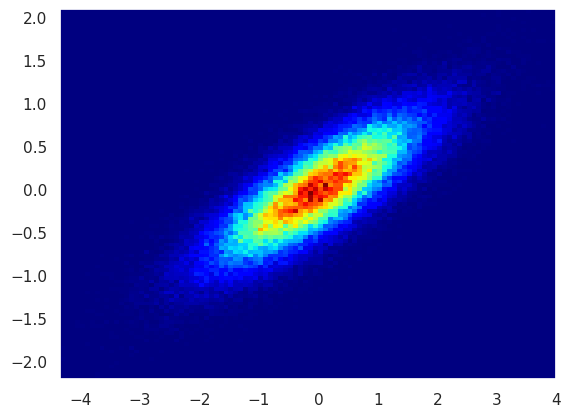

In [3]:

N_numbers = 100000
N_bins=100

mean = [.0, .0]
cov = [[1.,.4],
       [.4, .25]]

x,y = np.random.multivariate_normal(mean, cov, N_numbers).T
plt.hist2d(x, y, bins=N_bins, cmap=plt.cm.jet)
plt.show()



#heatmap, xedges, yedges = np.histogram2d(x,y, bins=N_bins)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#plt.clf()
#plt.imshow(heatmap, extent=extent,cmap=plt.cm.jet)
#plt.show()

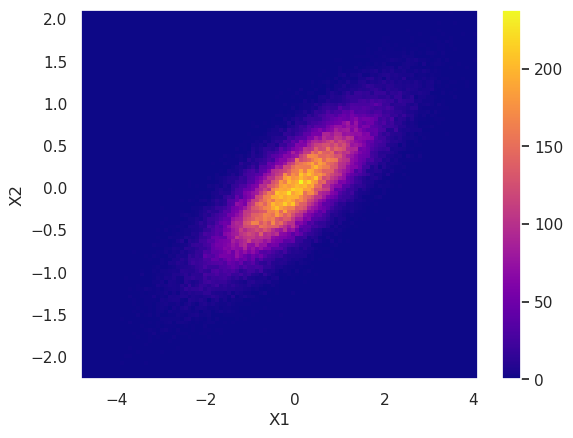

In [4]:
N_numbers = 100000
N_bins=100
x,y = np.random.multivariate_normal(mean, 
                                    cov, 
                                    N_numbers).T


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, cmap='plasma')
cb = plt.colorbar()
#cb.set_label('# of points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

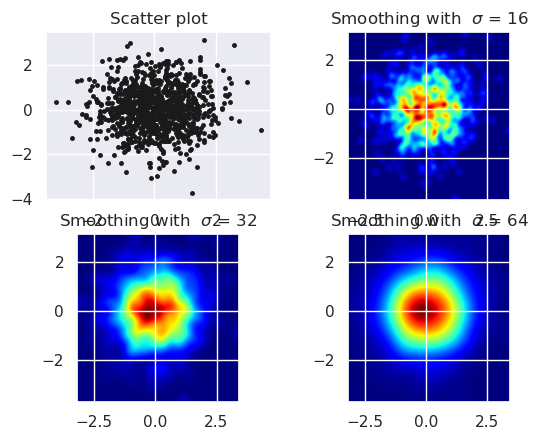

In [5]:

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

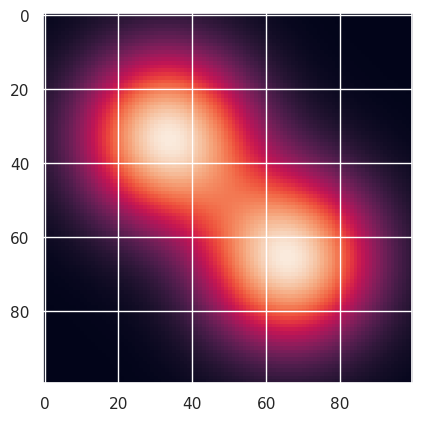

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# create 2 kernels
m1 = (-1,-1)
s1 = np.eye(2)
k1 = multivariate_normal(mean=m1, cov=s1)

m2 = (1,1)
s2 = np.eye(2)
k2 = multivariate_normal(mean=m2, cov=s2)

# create a grid of (x,y) coordinates at which to evaluate the kernels
xlim = (-3, 3)
ylim = (-3, 3)
xres = 100
yres = 100

x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)

# evaluate kernels at grid points
xxyy = np.c_[xx.ravel(), yy.ravel()]
zz = k1.pdf(xxyy) + k2.pdf(xxyy)

# reshape and plot image
img = zz.reshape((xres,yres))
plt.imshow(img); plt.show()

### 3. Summation  in Action

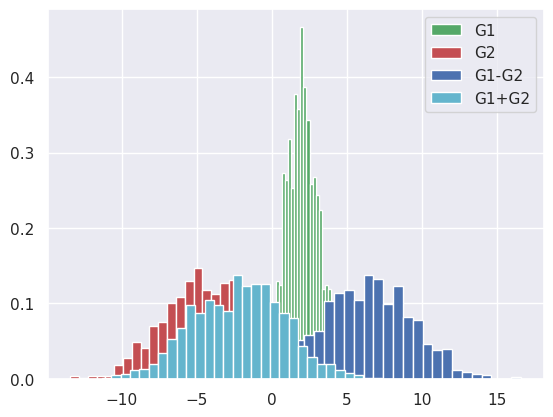

In [7]:
def gaussian_pdf(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) )

N=1000
mu1,sigma1=2.,1.
mu2,sigma2=-4.1,3

g1=np.random.default_rng().normal(mu1, sigma1, N)
g2=np.random.default_rng().normal(mu2, sigma2, N)

plt.hist(g1, 30, density=True,label='G1',color='g')
plt.hist(g2, 30, density=True,label='G2',color='r')
plt.hist(g1-g2, 30, density=True,label='G1-G2',color='b')
plt.hist(g1+g2, 30, density=True,label='G1+G2',color='c')
plt.legend()
plt.show()

# Gaussian Process Regression

### Posterior Predictive Distribution

Consider a regression problem

$$ y= \mathbf{w}^t \mathbf{x} + \epsilon $$


$$ y= \mathbf{w}^t \phi \big(\mathbf{x}\big) + \epsilon $$


Linear Regression, Ridge Regression and their kerneleized versions perform prediction after learning __one__ particular $\mathbf w$

$$ \mathbb P ( Y | \mathcal D, X)= \int_{\mathbf w} \mathbb P (Y, \mathbf w | \mathcal D, X) \;\; d\mathbf w$$

$$ \mathbb P ( Y | \mathcal D, X)= \int_{\mathbf w} \mathbb P (Y| \mathbf w , \mathcal D, X) \; \mathbb P(\mathbf w | D) \;\; d\mathbf w$$


$$ \mathbb P ( Y | \mathcal D, X) \sim \mathcal N (\mu,\Sigma)$$

## Gaussian Processes  Regression 

We assume that, before we observe the training labels, the labels are drawn from the zero-mean prior Gaussian distribution:


$$\begin{bmatrix}
y_1\\
\vdots\\
y_n\\
y_t
\end{bmatrix} 
\sim \mathcal{N}(0,\Sigma) $$
1. Without loss of generality, zero-mean is always possible by subtracting the sample mean.
2. We have $n$ training and $m$ test points


# Covariance Matrix $\Sigma$

1. $\Sigma_{ij} = \mathbb E \big((y_i -\mu_i)  (y_j -\mu_j) \big)$
2. $\Sigma$ is positive semi-definite
4. $\Sigma_{ii}= Variance(Y_i), i.e, \ge 0$
4. $y_i$ and $y_j$ are independent, i.e,. $x_i$ and $x_j$ are different, then $\Sigma_{ij}=\Sigma_{ji}=0$.
5. $x_i$ and $x_j$ are similar, then $\Sigma_{ij}=\Sigma_{ji}>0$.



# Constructing $\Sigma$ by using Kernels

$$ \Sigma = \begin{bmatrix}
K_{train}, K_{train,test}\\
K_{train,test} ^T, K_{test}
\end{bmatrix} $$

#### 1. $K_{train}$ and $K_{train,test}$ are the training and training-testing kernel matrix.

#### 2. $K_{test}$ is the testing kernel matrix

# Prediction
Given $\mathcal D = {(x_i,y_i)}_{i=1} ^n$ and a test data points
$\mathcal D = {(x_i,y_i)}_{i=1} ^m$


$$ \mathbb P \Big(Y_{test} | \mathcal D, X_{test})
\sim \mathcal{N}( K_{train, test}^T K_{train}^{-1} Y_{train}, K_{test}- K_{train, test}^T K_{train} ^{-1} K_{train,test} ) $$

### Ridge Regression $$ \mu= K_{train, test}^T K_{train}^{-1} Y_{train} $$

### Modeling uncertainties via Covariance matrix$$\Sigma=K_{test}- K_{train, test}^T K_{train} ^{-1} K_{train,test}$$

take the diagonal values, i.e,. variances

(6, 1) (6,)


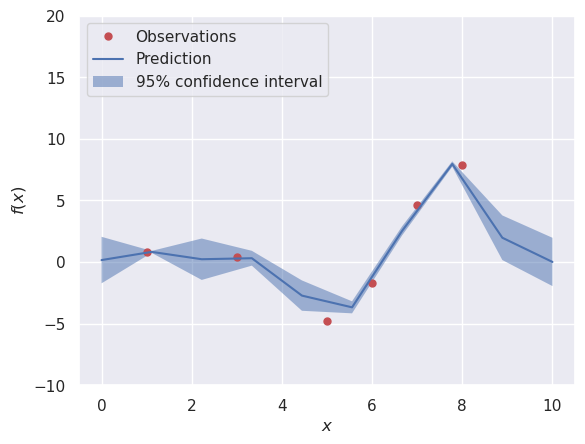

In [8]:
np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()


print(X.shape,y.shape)
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 10)).T

def gaussian_kernel(x, y, sigma=.55):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

def create_kernel_matrix(X):
    n=len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i,j] = gaussian_kernel(X[i], X[j])
    return K

# Instantiate a Gaussian Process model
K_train=create_kernel_matrix(X)
Kinv_train=np.linalg.inv(K_train)
assert K_train.shape ==Kinv_train.shape == (len(X),len(X))

K_test=create_kernel_matrix(x)
Kinv_test=np.linalg.inv(K_test)
assert K_test.shape ==Kinv_test.shape == (len(x),len(x))


# Compute Kernel function for each X_test with each X_train
K_train_test=create_kernel_matrix(np.concatenate((X,x)))

K_train_test=K_train_test[:-len(x),-len(x):]

K_train_test=K_train_test.reshape(len(X),len(x))


y_pred,covariance=(K_train_test.T@Kinv_train@y), (K_test-K_train_test.T@Kinv_train@K_train_test)
sigma=covariance.diagonal()



# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()


# SKLEARN EXAMPLES

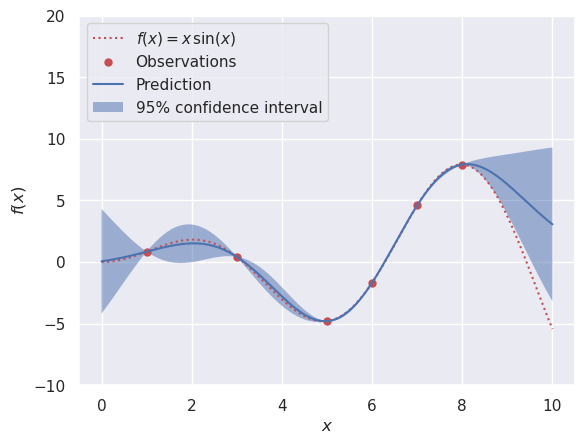

In [9]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
l=np.concatenate([x, x[::-1]])
lm=np.concatenate([y_pred - 1.9600 * sigma,(y_pred + 1.9600 * sigma)[::-1]])
plt.fill(l,lm,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

Time for KRR fitting: 4.917
Time for GPR fitting: 0.098
Time for KRR prediction: 0.053
Time for GPR prediction: 0.062
Time for GPR prediction with standard-deviation: 0.073


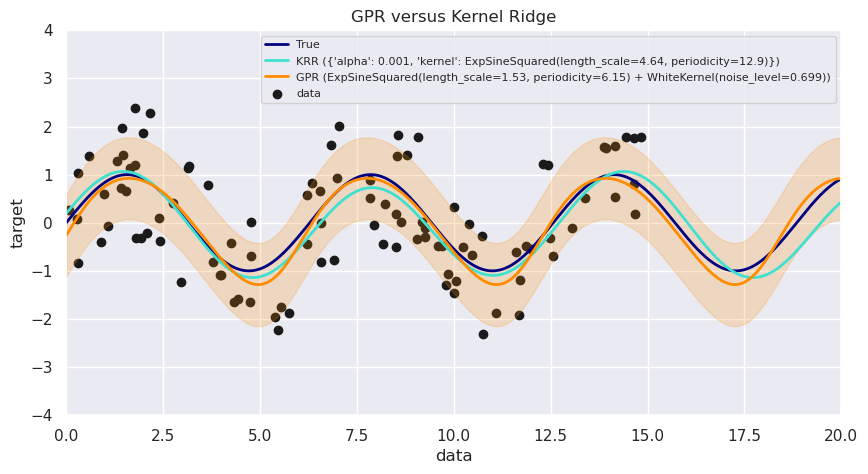

In [10]:
import time

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

rng = np.random.RandomState(0)

# Generate sample data
X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise

# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}
kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
stime = time.time()
kr.fit(X, y)
print("Time for KRR fitting: %.3f" % (time.time() - stime))

gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

# Predict using kernel ridge
X_plot = np.linspace(0, 20, 10000)[:, None]
stime = time.time()
y_kr = kr.predict(X_plot)
print("Time for KRR prediction: %.3f" % (time.time() - stime))

# Predict using gaussian process regressor
stime = time.time()
y_gpr = gpr.predict(X_plot, return_std=False)
print("Time for GPR prediction: %.3f" % (time.time() - stime))

stime = time.time()
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
print("Time for GPR prediction with standard-deviation: %.3f"
      % (time.time() - stime))

# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')
plt.plot(X_plot, y_kr, color='turquoise', lw=lw,
         label='KRR (%s)' % kr.best_params_)
plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
         label='GPR (%s)' % gpr.kernel_)
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2)
plt.xlabel('data')
plt.ylabel('target')
plt.xlim(0, 20)
plt.ylim(-4, 4)
plt.title('GPR versus Kernel Ridge')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

# Gpytorch Example

In [11]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)

In [13]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

In [14]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 50


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

Iter 1/50 - Loss: 0.934   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 0.903   lengthscale: 0.644   noise: 0.644
Iter 3/50 - Loss: 0.869   lengthscale: 0.598   noise: 0.598
Iter 4/50 - Loss: 0.831   lengthscale: 0.555   noise: 0.554
Iter 5/50 - Loss: 0.789   lengthscale: 0.514   noise: 0.513
Iter 6/50 - Loss: 0.742   lengthscale: 0.475   noise: 0.474
Iter 7/50 - Loss: 0.692   lengthscale: 0.439   noise: 0.437
Iter 8/50 - Loss: 0.640   lengthscale: 0.404   noise: 0.402
Iter 9/50 - Loss: 0.592   lengthscale: 0.372   noise: 0.369
Iter 10/50 - Loss: 0.547   lengthscale: 0.342   noise: 0.339
Iter 11/50 - Loss: 0.507   lengthscale: 0.315   noise: 0.310
Iter 12/50 - Loss: 0.470   lengthscale: 0.292   noise: 0.284
Iter 13/50 - Loss: 0.435   lengthscale: 0.272   noise: 0.259
Iter 14/50 - Loss: 0.400   lengthscale: 0.256   noise: 0.237
Iter 15/50 - Loss: 0.367   lengthscale: 0.244   noise: 0.216
Iter 16/50 - Loss: 0.334   lengthscale: 0.233   noise: 0.196
Iter 17/50 - Loss: 0.301   length

In [15]:
# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(0, 1, 51)
    observed_pred = likelihood(model(test_x))

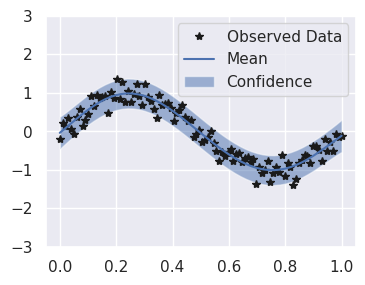

In [16]:
with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])